# What Factors Sell a Car?

# Introduction

In this project an analysis of vehicle advertising data will be carried out. This project analysis will determine the factors that affect the price of a vehicle.

## Purpose

This project will test several hypotheses related to vehicle prices, namely:
1. The higher the age of the vehicle, the cheaper the price of the vehicle
2. The higher the odometer value, the cheaper the vehicle price
3. The higher the quality of the condition of the vehicle, the more expensive it is
4. Automatic transmission has a higher price because it is more comfortable
5. In general, black and silver cars have a higher after-sales price

## Stages 

In this project the dataset will be taken from /datasets/vehicles_us.csv, which is a collection of vehicle advertisement data that must be explored.

First, a review of this data will be carried out, then handling missing data, outliers to improve data quality and finally an analysis is carried out to answer the hypothesis that has been raised.

## This project will consist of 3 stages, namely:
1. Overview
2. Pre-processing
3. Hypothesis Test

## Pre-processing

In [1]:

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:

try:
    df = pd.read_csv('vehicles_us.csv')
except:
    df = pd.read_csv('/datasets/vehicles_us.csv')


In [3]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [5]:
df.median()

price            9000.0
model_year       2011.0
cylinders           6.0
odometer       113000.0
is_4wd              1.0
days_listed        33.0
dtype: float64

the comparison of the mean and median shows that overall the mean is higher than the median so it can be concluded that the upward distribution of the data is very high so that the distribution is not balanced

In [6]:


df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28




in the price column there is a car price whose value is 1 which is illogical, there is also a value in the odometer column which has a value of 0, but this will be examined further.
several columns have missing data, and the largest is the is_4wd column, but it seems that the Nan value indicates that the vehicle is not a 4wd type car, the missing value is the model_year of concern, but this will be examined further

In [7]:
df[df['is_4wd'].isnull()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29




model year column should be str data type, cylinder column should be int data type, odometer column should be int data type, date_posted column should be datetime data type

In [8]:
df[df['price']<10].tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
49709,1,NaN,ford f150,excellent,8.0,gas,139700.0,other,pickup,red,1.0,2019-03-11,18
50245,1,1986.0,chevrolet silverado,good,8.0,gas,NaN,automatic,truck,red,1.0,2018-11-30,50
50393,1,2003.0,gmc sierra 2500hd,good,8.0,diesel,212300.0,automatic,pickup,black,1.0,2019-04-12,28
50430,5,2011.0,toyota sienna,good,6.0,gas,NaN,automatic,SUV,green,NaN,2018-12-03,5
51256,1,2012.0,honda civic lx,excellent,4.0,gas,71262.0,automatic,sedan,blue,NaN,2018-05-06,53


there are missing values in 5 columns, from the initial appearance, the missing values are random / there is no relationship between columns, but it seems that the missing values in the is_4wd column are missing values from the index for non 4wd cars, judging from its relation to the type of car it looks still random with the type car

### Conclusion and Next Steps


1. all data in each column looks normal, but there is missing data in the model_year, cylinders, odometer, paint_color, and is_4wd columns. the missing data appears to be random, except for the data in the is_4wd column which is an index for 4 wd vehicles

2. There is a car price = 1 and an odometer = 0, but this will be examined further

## Overcoming Missing Values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [10]:
df['is_4wd'] = df['is_4wd'].fillna(0)

is_4wd column, missing data replaced by 0

In [11]:
df = df.dropna(subset=['model_year'])

model_year column, missing data is deleted

In [12]:
df['cylinders'] = df.groupby(['model','type'])['cylinders'].apply(lambda x: x.fillna(x.median()))

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

cylinders column, missing data is replaced with data from the same model and type, but the remaining 15 data will be discarded

In [13]:
df['cylinders'].isna().sum()

16

In [14]:
df = df.dropna(subset=['cylinders'])

In [15]:
df[df['odometer']==0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
352,7997,2009.0,gmc yukon,excellent,8.0,gas,0.0,automatic,SUV,white,1.0,2019-03-16,88
814,2995,1999.0,ford f-150,good,6.0,gas,0.0,manual,truck,NaN,0.0,2019-03-14,16
1461,1000,1992.0,gmc sierra 1500,good,8.0,gas,0.0,automatic,truck,NaN,0.0,2018-09-28,47
1970,10988,2000.0,ford f-250 sd,good,8.0,diesel,0.0,automatic,truck,white,1.0,2018-11-21,39
2049,30000,1969.0,chevrolet corvette,excellent,8.0,other,0.0,automatic,convertible,white,0.0,2018-08-01,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49043,8987,2011.0,honda cr-v,good,4.0,gas,0.0,automatic,SUV,custom,1.0,2019-02-18,38
49170,3300,2002.0,hyundai santa fe,good,6.0,gas,0.0,automatic,wagon,white,1.0,2019-04-14,31
49284,3300,2002.0,hyundai santa fe,good,6.0,gas,0.0,automatic,wagon,white,1.0,2019-02-15,7
50631,3600,2012.0,chrysler 200,good,4.0,gas,0.0,automatic,sedan,red,0.0,2018-07-24,90


odometer, the odometer value is 0, it turns out to be an old car, so it can be considered as an error, so it is changed to NaN and filled with the median model and type of car

In [16]:
df.loc[df['odometer'] == 0, 'odometer'] = np.nan

In [17]:
df[df['odometer']==0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


In [18]:
df['odometer'] = df.groupby(['model','type'])['odometer'].apply(lambda x: x.fillna(x.median()))

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [19]:
df['odometer'].isna().sum()

47

In [20]:
df = df.dropna(subset=['odometer'])

In [21]:
df['paint_color'] = df['paint_color'].fillna('NA')

In my opinion, the paint_color column is not very important, but if it is deleted it will sacrifice other data, so just fill it with NA (not available)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47843 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         47843 non-null  int64  
 1   model_year    47843 non-null  float64
 2   model         47843 non-null  object 
 3   condition     47843 non-null  object 
 4   cylinders     47843 non-null  float64
 5   fuel          47843 non-null  object 
 6   odometer      47843 non-null  float64
 7   transmission  47843 non-null  object 
 8   type          47843 non-null  object 
 9   paint_color   47843 non-null  object 
 10  is_4wd        47843 non-null  float64
 11  date_posted   47843 non-null  object 
 12  days_listed   47843 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


## Fixed Data Type



the model_year column is better for the datetime type, because to simplify calculations, cylinder and odometer are better int, because the number of cylinders and distances have no decimals, date_posted is better than date_time so it's easy to modify

In [23]:
df['model_year'] = df['model_year'].astype(int)

In [24]:
df['cylinders'] = df['cylinders'].astype(int)

In [25]:
df['odometer'] = df['odometer'].astype(int)

In [26]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47843 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         47843 non-null  int64         
 1   model_year    47843 non-null  int64         
 2   model         47843 non-null  object        
 3   condition     47843 non-null  object        
 4   cylinders     47843 non-null  int64         
 5   fuel          47843 non-null  object        
 6   odometer      47843 non-null  int64         
 7   transmission  47843 non-null  object        
 8   type          47843 non-null  object        
 9   paint_color   47843 non-null  object        
 10  is_4wd        47843 non-null  float64       
 11  date_posted   47843 non-null  datetime64[ns]
 12  days_listed   47843 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 5.1+ MB


## Improve Data Quality

In [28]:


df['day_posted'] = df['date_posted'].dt.day_name()
df['month_posted'] = df['date_posted'].dt.month
df['year_posted'] = df['date_posted'].dt.year

In [29]:


df['vehicle_age'] = df['date_posted'].dt.year - df['model_year']

In [30]:


def distance(x,y):
    try:
        result = x / y
    except ZeroDivisionError:
        result = 0
    return result

In [31]:
distance(df['odometer'],df['vehicle_age'])
df['distance_per_year'] = df.apply(lambda row: distance(row['odometer'], row['vehicle_age']), axis=1)

replace the value in the 'condition' column with something that can be manipulated more easily

In [32]:

def condition_index(x):
    if x == 'new':
        return 5
    elif x == 'like new':
        return 4
    elif x == 'excellent':
        return 3
    elif x == 'good':
        return 2
    elif x == 'fair':
        return 1
    else:
        return 0
    

In [33]:
df['condition_index'] = df['condition'].apply(lambda x: condition_index(x))

In [34]:
df['condition_index'].value_counts().sort_values(ascending=False)

3    23026
2    18686
4     4406
1     1489
5      133
0      103
Name: condition_index, dtype: int64


## Checking Clean Data

In [35]:


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47843 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              47843 non-null  int64         
 1   model_year         47843 non-null  int64         
 2   model              47843 non-null  object        
 3   condition          47843 non-null  object        
 4   cylinders          47843 non-null  int64         
 5   fuel               47843 non-null  object        
 6   odometer           47843 non-null  int64         
 7   transmission       47843 non-null  object        
 8   type               47843 non-null  object        
 9   paint_color        47843 non-null  object        
 10  is_4wd             47843 non-null  float64       
 11  date_posted        47843 non-null  datetime64[ns]
 12  days_listed        47843 non-null  int64         
 13  day_posted         47843 non-null  object        
 14  month_

In [36]:


df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age,distance_per_year,condition_index
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,NA,1.0,2018-06-23,19,Saturday,6,2018,7,20714.285714,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,Thursday,2,2019,6,18333.333333,4
3,1500,2003,ford f-150,fair,8,gas,127272,automatic,pickup,NA,0.0,2019-03-22,9,Friday,3,2019,16,7954.500000,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,Tuesday,4,2019,2,40451.500000,3
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1.0,2018-06-20,15,Wednesday,6,2018,4,14488.500000,3


## Studying Core Parameters


- The parameters are
- Price
- The age of the vehicle when the ad was shown
- Mileage
- Number of cylinders
- Condition

the boxplot price shown after the upper price limit of 35000 is an outlier

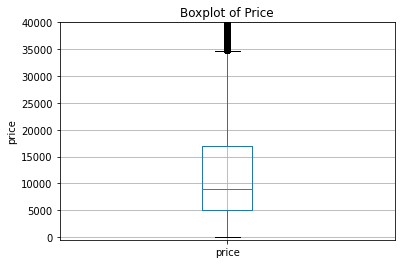

In [37]:
#
df.boxplot('price')
plt.ylim(-500, 40000)
plt.title('Boxplot of Price')
plt.ylabel('price')
plt.show()

the vehicle_age boxplot shown after the upper limit of 24 is an outlier

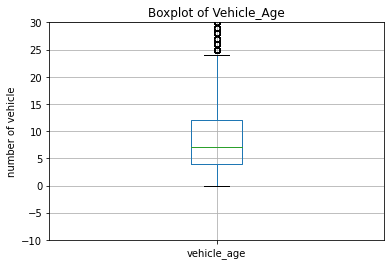

In [38]:
#
df.boxplot('vehicle_age')
plt.ylim(-10, 30)
plt.title('Boxplot of Vehicle_Age')
plt.ylabel('number of vehicle')
plt.show()

the distance_per_year boxplot shown after the upper limit of 38000 is an outlier

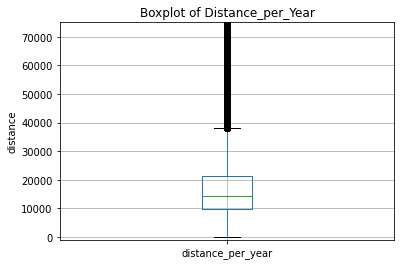

In [39]:
#
df.boxplot('distance_per_year')
plt.ylim(-1000, 75000)
plt.title('Boxplot of Distance_per_Year')
plt.ylabel('distance')
plt.show()

the cylinders boxplot shows that all data is normal

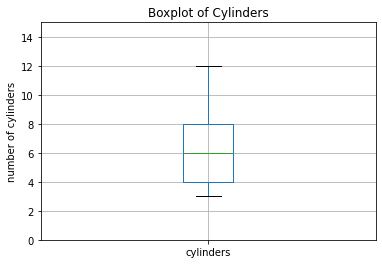

In [40]:
#
df.boxplot('cylinders')
plt.ylim(0, 15)
plt.title('Boxplot of Cylinders')
plt.ylabel('number of cylinders')
plt.show()

the condition_index boxplot shows that conditions 0 and 5 are outliers

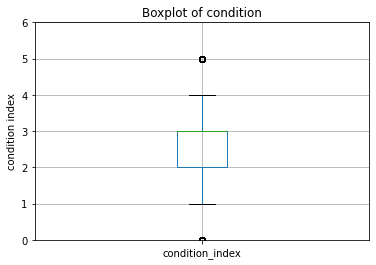

In [41]:
#
df.boxplot('condition_index')
plt.ylim(0, 6)
plt.title('Boxplot of condition')
plt.ylabel('condition index')
plt.show()

## Studying and Dealing with Outliers

from the boxplot above, I use the price, vehicle_age, and distance_per_year columns as oulier detectors, then the data is filtered by the conditions resulting from the calculation of the outlier limits, while the condition index column, although indexes 1 and 5 are detected as outliers, I do not filter them because they are not significant

In [42]:
list_of_selected_column = ['price','vehicle_age','distance_per_year']

def upper_lower_whisker(column_name=''):
    Q1  = df[column_name].quantile(.25)
    Q3  = df[column_name].quantile(.75)
    IQR = Q3-Q1
    lower_whisker = Q1 - 1.5*IQR
    upper_whisker = Q3 + 1.5*IQR

    return lower_whisker, upper_whisker

df2 = df.copy()
print(df2.shape)

for column in list_of_selected_column:
    print('start cleaning outlier on ', column)
    lower, upper = upper_lower_whisker(column)
    df2 = df2[(df2[column] > lower) & (df2[column] < upper )]
    print('cleaning outlier on ', column, ' was finished!')

(47843, 19)
start cleaning outlier on  price
cleaning outlier on  price  was finished!
start cleaning outlier on  vehicle_age
cleaning outlier on  vehicle_age  was finished!
start cleaning outlier on  distance_per_year
cleaning outlier on  distance_per_year  was finished!


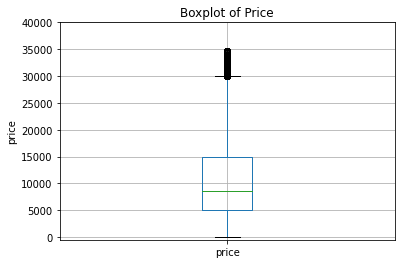

In [43]:
df2.boxplot('price')
plt.ylim(-500, 40000)
plt.title('Boxplot of Price')
plt.ylabel('price')
plt.show()

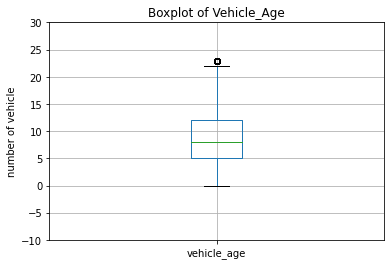

In [44]:
df2.boxplot('vehicle_age')
plt.ylim(-10, 30)
plt.title('Boxplot of Vehicle_Age')
plt.ylabel('number of vehicle')
plt.show()

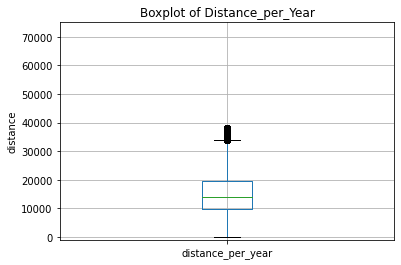

In [45]:
df2.boxplot('distance_per_year')
plt.ylim(-1000, 75000)
plt.title('Boxplot of Distance_per_Year')
plt.ylabel('distance')
plt.show()

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42607 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              42607 non-null  int64         
 1   model_year         42607 non-null  int64         
 2   model              42607 non-null  object        
 3   condition          42607 non-null  object        
 4   cylinders          42607 non-null  int64         
 5   fuel               42607 non-null  object        
 6   odometer           42607 non-null  int64         
 7   transmission       42607 non-null  object        
 8   type               42607 non-null  object        
 9   paint_color        42607 non-null  object        
 10  is_4wd             42607 non-null  float64       
 11  date_posted        42607 non-null  datetime64[ns]
 12  days_listed        42607 non-null  int64         
 13  day_posted         42607 non-null  object        
 14  month_


## Learn Core Parameters Without Outliers

Judging from the histogram graph, it appears that after the outliers are filtered, it appears that the shape of the graph resembles the distribution of the normal curve

there are still car prices around 0, after reviewing there are 658 that cost 1, then fill in with the same median model and car type

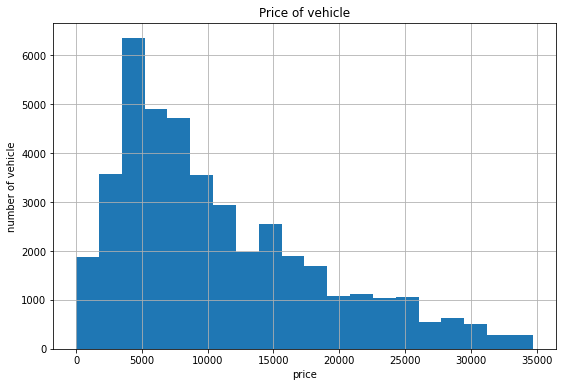

In [47]:
df2.hist('price', bins=20, figsize=(9,6))
plt.title('Price of vehicle')
plt.xlabel('price')
plt.ylabel('number of vehicle')
plt.show()

In [48]:
df2[df2['price']==1].count()

price                658
model_year           658
model                658
condition            658
cylinders            658
fuel                 658
odometer             658
transmission         658
type                 658
paint_color          658
is_4wd               658
date_posted          658
days_listed          658
day_posted           658
month_posted         658
year_posted          658
vehicle_age          658
distance_per_year    658
condition_index      658
dtype: int64

In [49]:
df2.loc[df['price'] == 1, 'price'] = np.nan

In [50]:
df2['price'] = df2.groupby(['model','type'])['price'].apply(lambda x: x.fillna(x.median()))

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [51]:
df2['price'].isna().sum()

1

In [52]:
df2 = df2.dropna(subset=['price'])

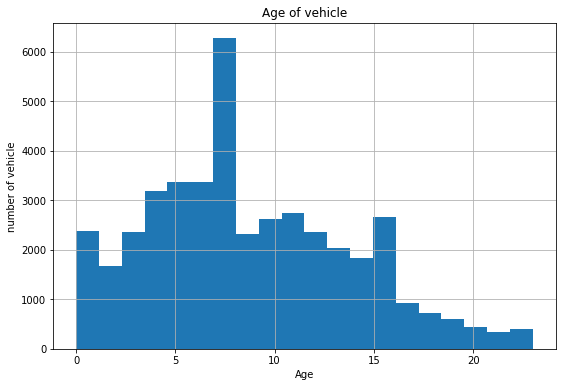

In [53]:
df2.hist('vehicle_age', bins=20, figsize=(9,6))
plt.title('Age of vehicle')
plt.xlabel('Age')
plt.ylabel('number of vehicle')
plt.show()

the highest distance per year is in the range of 10000 - 15000

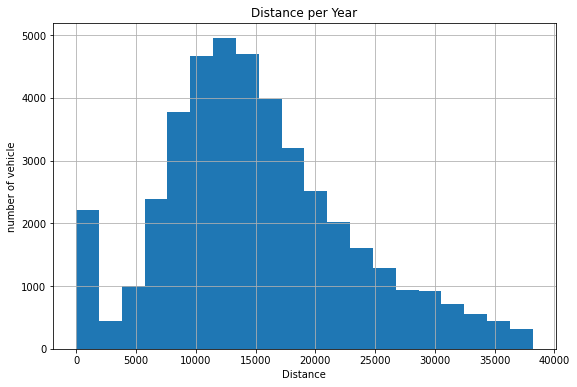

In [54]:
df2.hist('distance_per_year', bins=20, figsize=(9,6))
plt.title('Distance per Year')
plt.xlabel('Distance')
plt.ylabel('number of vehicle')
plt.show()

excellent condition is the highest, followed by good, like new, salvage, new

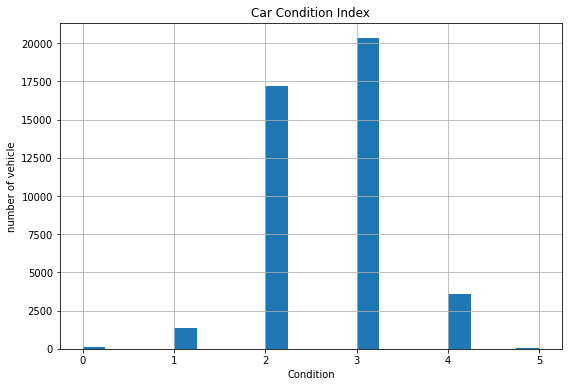

In [55]:
df2.hist('condition_index', bins=20, figsize=(9,6))
plt.title('Car Condition Index')
plt.xlabel('Condition')
plt.ylabel('number of vehicle')
plt.show()

## Days Ads Listed


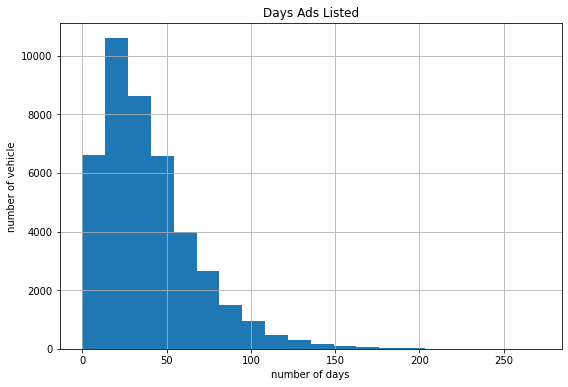

In [56]:
df2.hist('days_listed', bins=20, figsize=(9,6))
plt.title('Days Ads Listed')
plt.xlabel('number of days')
plt.ylabel('number of vehicle')
plt.show()

In [57]:
df2['days_listed'].mean()

39.56724405013379

In [58]:
df2['days_listed'].median()

33.0

In [59]:
df2['days_listed'].describe()

count    42606.000000
mean        39.567244
std         28.255853
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

based on histograms and statistics it appears that ads generally last around 33-39 days
From the histogram, it can also be seen that ads are removed quickly in the range of 0-19 days and the duration of removal is above 53 days
if you see that the mean is greater than the median then generally most of the ads are removed for a long time

## Average Price of Each Type of Vehicle

The 2 vehicles with the highest average prices are buses and trucks

The 2 vehicles with the most advertisements are sedans and SUVs

In [60]:
price_mean = df2.pivot_table(index='type', values='price', aggfunc='mean').sort_values(by='price', ascending=False)

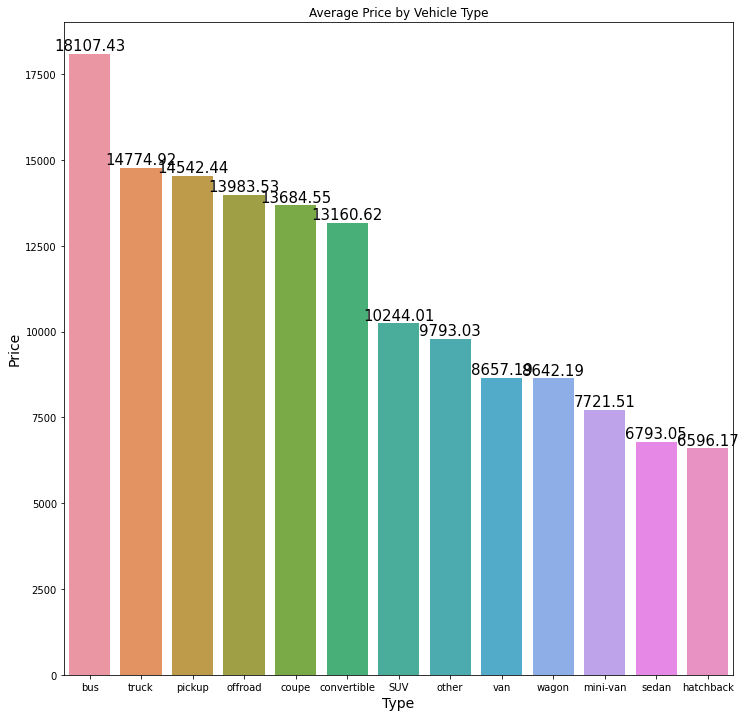

In [61]:
plt.figure(figsize=(12, 12))
plots = sns.barplot(x=price_mean.index, y='price', data=price_mean)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Type", size=14)
plt.ylabel("Price", size=14)
plt.title("Average Price by Vehicle Type")
plt.show()

The average price table by vehicle type shows buses and trucks are the 2 vehicles with the highest average price, while sedans and hatchbacks are the 2 vehicles with the lowest average price

In [62]:
price_count = df2.pivot_table(index='type', values='price', aggfunc='count').sort_values(by='price', ascending=False)

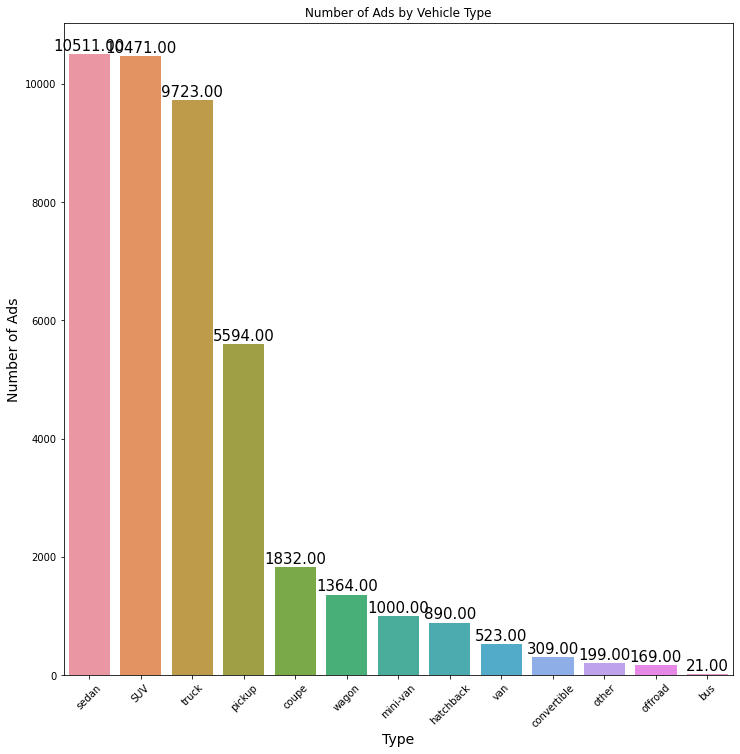

In [65]:
plt.figure(figsize=(12, 12))
plotx = sns.barplot(x=price_count.index, y='price', data=price_count)
for bar in plotx.patches:
    plotx.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Type", size=14)
plt.ylabel("Number of Ads", size=14)
plt.title("Number of Ads by Vehicle Type")
plt.xticks(rotation = 45)
plt.show()

The table of the number of advertisements displayed by vehicle type shows that sedans and SUVs are the 2 types of vehicles with the most advertisements, while offroad vehicles and buses are the vehicles with the fewest advertisements.

## Price Factor

In [64]:
df3 = df2[df2['type'].isin(['SUV', 'sedan'])]

transmission

In [65]:
transmission = (df3['transmission'].value_counts(normalize=True)*100).round(2).map(str) + '%'
transmission_count = df3['transmission'].value_counts()
transmission_report = pd.DataFrame({'percent': transmission, 'count': transmission_count})
transmission_report.rename_axis("unique", axis="index", inplace=True)
transmission_report

,percent,count
unique,,
automatic,94.35%,19797
manual,4.53%,950
other,1.12%,235


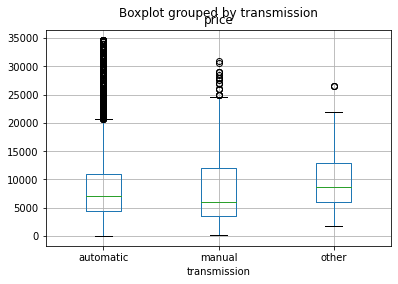

In [66]:
df3.boxplot(by='transmission', column='price')
plt.show()

From the boxplot, it can be seen that the price of automatic type vehicles is more expensive than manual and other vehicles

paint_color

In [67]:
paint = (df3['paint_color'].value_counts(normalize=True)*100).round(2).map(str) + '%'
paint_count = df3['paint_color'].value_counts()
paint_report = pd.DataFrame({'percent': paint, 'count': paint_count})
paint_report.rename_axis("unique", axis="index", inplace=True)
paint_report

,percent,count
unique,,
NA,17.98%,3772
black,15.97%,3351
silver,14.94%,3135
white,13.96%,2930
grey,11.41%,2393
blue,9.38%,1969
red,7.71%,1618
green,2.66%,559
brown,2.59%,543


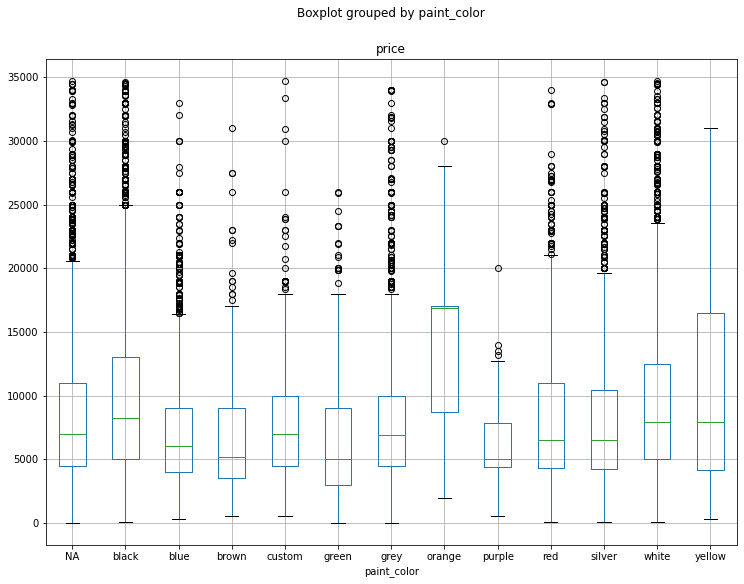

In [68]:
df3.boxplot(by='paint_color', column='price', figsize=(12,9))
plt.show()


Overall, there is no significant color preference for price, yellow and orange are the color preferences with the highest vehicle prices

car age

In [69]:
age = (df3['vehicle_age'].value_counts(normalize=True)*100).round(2).map(str) + '%'
age_count = df3['vehicle_age'].value_counts()
age_report = pd.DataFrame({'percent': age, 'count': age_count})
age_report.rename_axis("unique", axis="index", inplace=True)
age_report

,percent,count
unique,,
6,8.92%,1872
5,8.42%,1767
7,8.38%,1758
4,7.83%,1642
11,7.03%,1475
8,6.94%,1457
10,6.34%,1331
9,6.32%,1326
3,5.67%,1189


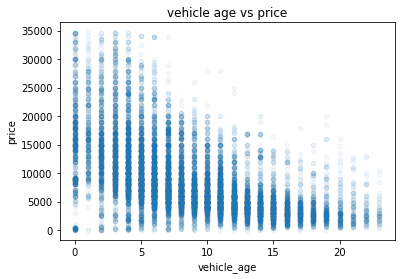

In [70]:
df3.plot(x='vehicle_age', y='price', kind='scatter', alpha=0.05)
plt.title('vehicle age vs price')
plt.show()

From the scatter plot it appears that the older the vehicle, the cheaper the price

odometer

In [71]:
odometer = (df3['odometer'].value_counts(normalize=True)*100).round(2).map(str) + '%'
odometer_count = df3['odometer'].value_counts()
odometer_report = pd.DataFrame({'percent': odometer, 'count': odometer_count})
odometer_report.rename_axis("unique", axis="index", inplace=True)
odometer_report

,percent,count
unique,,
130000,0.92%,192
92000,0.69%,145
127000,0.56%,117
129766,0.54%,114
108721,0.52%,110
...,...,...
4500,0.0%,1
43411,0.0%,1
115086,0.0%,1


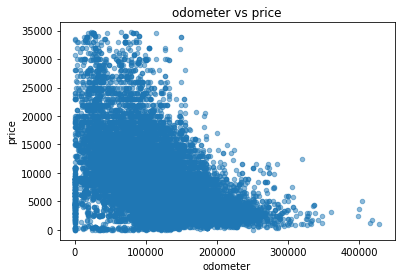

In [72]:
df3.plot(x='odometer', y='price', kind='scatter', alpha=0.5)
plt.title('odometer vs price')
plt.show()

From the scatter plot it appears that the higher the odometer value, the cheaper the price and vice versa

car condition

In [73]:
condition = (df3['condition_index'].value_counts(normalize=True)*100).round(2).map(str) + '%'
condition_count = df3['condition_index'].value_counts()
condition_report = pd.DataFrame({'percent': condition, 'count': condition_count})
condition_report.rename_axis("unique", axis="index", inplace=True)
condition_report

,percent,count
unique,,
3,51.29%,10761
2,35.99%,7552
4,9.64%,2023
1,2.6%,546
5,0.25%,52
0,0.23%,48


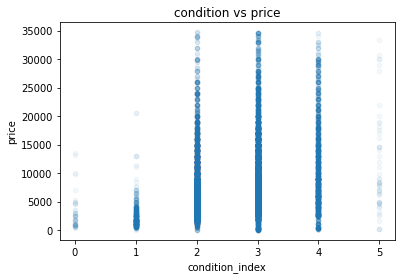

In [74]:
df3.plot(x='condition_index', y='price', kind='scatter', alpha=0.05)
plt.title('condition vs price')
plt.show()

Overall, cars with excellent(2), like new(4) and good(2) conditions have prices from highest to lowest, but there is no significant difference between the three. new(5) condition cars have the highest price range, but the number is small. cars with fair(1) and salvage(0) conditions are the cheapest

## Final Conclusion


the analysis aims to examine datasets over the past few years and determine the factors that influence the price of a vehicle.
The following is a resume that has been done:
handle lost data:
1. there are 5 missing data columns model_year, cylinders, odometer, paint_color, and is_4wd
2. The model year column is the year of the vehicle which is difficult to find, so the missing data is deleted
3. column cylinders, odometer, filled with the median of the model and type of similar vehicles
4. column is_4wd is an index to determine the type of 4 wheel drive car, so missing data is replaced with a value of 0
5. paint_color column, missing data is filled with NA (not available) because the data is not very important and if deleted it will discard other data
handle data outliers:
1. odometer column = 0, while not a new car, filled with the median of similar models and types
2. Column price = 1, filled with the median of similar models and types
change data type:
1. change the data type of the column model_year, cylinder, odometer to integer
2. change the data type of the date_posted column to datetime
improve data quality:
1. Add a new column that contains the value of the time and date when the ad was shown
2. Added a new column containing the age of the vehicle when the ad was shown
3. Added a new column containing the average vehicle mileage per year
4. Added a new column containing the index of the car's condition
learn the core parameters
1. Study the core parameters, namely price, vehicle age, mileage, cylinder and condition
2. perform an analysis with a boxplot and clean out the outliers
analysis results
1. In general, ads run for 33-39 days
2. The 2 vehicles with the highest average prices are buses and trucks
3. The 2 vehicles with the most advertisements are sedans and SUVs
4. Automatic type transmission vehicles are more expensive than manual and other vehicles
5. Overall there is no significant color preference for price, yellow and orange are the color preferences with the highest vehicle prices
6. The older the vehicle, the cheaper the price, and vice versa
7. The lower the odometer value, the higher the price and vice versa
8. Cars in excellent conditions, like new and good have the highest prices with cars in excellent conditions having the highest number, while cars in fair and salvage conditions are the cheapest